## **Question 1**
- Using the IBM and AWS stock datasets (and sample code provided) develop further the LSTM model for each dataset. 
- Note you 
can add more nodes and stacks, and you can also modify look back. 
- The goal is to reduce the RMSE.
- Note: this is a single variate problem.

In [ ]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math

from numpy import array
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import pandas as pd 

%matplotlib inline


### **Function**

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

def plot_train_test(x, y, z):
    plt.plot(x)
    plt.plot(y)
    plt.plot(z)
    plt.show()

def plot_future(x, y, z):
    plt.plot(x, label='Original Data')
    plt.plot(y, label='Test Evaluation')
    plt.plot(z, label='Future Predictions')
    plt.legend()
    plt.title("Last 50 values of data and 10 Future predictions")
    plt.show()

### **IBM Stock**

Epoch 1/5
2016/2016 [==============================] - 11s 4ms/step - loss: 0.0418
Epoch 2/5
2016/2016 [==============================] - 7s 3ms/step - loss: 0.0016
Epoch 3/5
2016/2016 [==============================] - 8s 4ms/step - loss: 0.0010
Epoch 4/5
2016/2016 [==============================] - 7s 3ms/step - loss: 6.3073e-04
Epoch 5/5
31/31 [==============================] - 0s 1ms/step
Train Score: 2.70 RMSE
Test Score: 3.42 RMSE


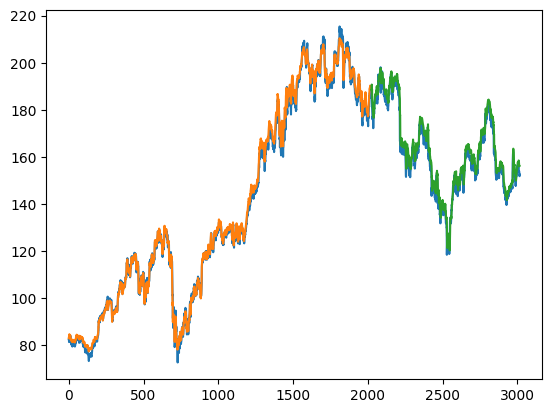

In [ ]:
seed = 1
numpy.random.seed(seed)
tf.random.set_seed(seed)

# load the dataset
dataframe = read_csv("IBM_2006-01-01_to_2018-01-01.csv", usecols=[1], engine='python', skipfooter=3).dropna()
dataset = dataframe.values
dataset = dataset.astype('float32')


# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]


# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


# create and fit the LSTM network
model3 = Sequential()
model3.add(LSTM(4, input_shape=(1,look_back), return_sequences=True))
model3.add(LSTM(2, input_shape=(1,look_back), return_sequences=True))
model3.add(LSTM(1, input_shape=(1,look_back)))
model3.add(Dense(1))
model3.compile(loss='mean_squared_error', optimizer='adam')
model3.fit(trainX, trainY, epochs=5, batch_size=1, verbose=1)

# make predictions
trainPredict = model3.predict(trainX)
testPredict = model3.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plot_train_test(scaler.inverse_transform(dataset), trainPredict, testPredictPlot)

1/1 [==============================] - 1s 820ms/step
$156.12883
1/1 [==============================] - 0s 17ms/step
$155.30893
1/1 [==============================] - 0s 19ms/step
$155.2731
1/1 [==============================] - 0s 16ms/step
$155.961
1/1 [==============================] - 0s 27ms/step
$156.11649
1/1 [==============================] - 0s 26ms/step
$158.3197
1/1 [==============================] - 0s 21ms/step
$158.1017
1/1 [==============================] - 0s 32ms/step
$158.15842
1/1 [==============================] - 0s 21ms/step
$159.50262
1/1 [==============================] - 0s 21ms/step
$159.5522


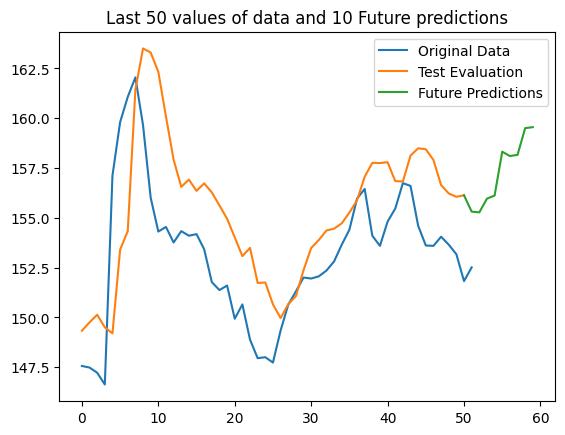

In [ ]:
# only visualising with last 50 from dataset
predictions = [None] * 50

testTemp = test[:]

# predict for 10 days
for _ in range(10):
    testX, y  = create_dataset(testTemp, look_back)
    # gets last element
    testX = numpy.reshape(testX[-1], (1, 1, testX.shape[1]))
    # make predictions based off last day
    testPredict = model3.predict(testX)

    # invert predictions
    testPredict = scaler.inverse_transform(testPredict)
    print("$"+str(testPredict[0][0]))
    predictions.append(testPredict[0][0])
    testPredictNorm = scaler.transform(testPredict)

    # append on for next prediction
    testTemp = numpy.append(testTemp, testPredictNorm, axis=0)
    

# plot baseline and predictions
plot_future(scaler.inverse_transform(dataset)[-52:], testPredictPlot[-52:],predictions)

### **Amazon Stock**

Epoch 1/10
678/678 - 4s - loss: 0.0126 - 4s/epoch - 6ms/step
Epoch 2/10
678/678 - 1s - loss: 2.8619e-04 - 1s/epoch - 2ms/step
Epoch 3/10
678/678 - 1s - loss: 2.5713e-04 - 1s/epoch - 2ms/step
Epoch 4/10
678/678 - 1s - loss: 2.0547e-04 - 1s/epoch - 2ms/step
Epoch 5/10
678/678 - 1s - loss: 1.8226e-04 - 1s/epoch - 2ms/step
Epoch 6/10
678/678 - 1s - loss: 1.4687e-04 - 1s/epoch - 2ms/step
Epoch 7/10
678/678 - 1s - loss: 1.5960e-04 - 1s/epoch - 2ms/step
Epoch 8/10
678/678 - 1s - loss: 1.4794e-04 - 1s/epoch - 2ms/step
Epoch 9/10
678/678 - 1s - loss: 1.5668e-04 - 1s/epoch - 2ms/step
Epoch 10/10
678/678 - 1s - loss: 1.5238e-04 - 1s/epoch - 2ms/step
11/11 [==============================] - 0s 2ms/step
Train Score: 11.56 RMSE
Test Score: 20.58 RMSE


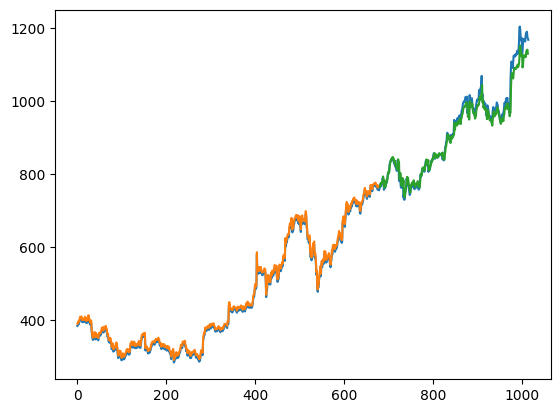

1/1 [==============================] - 0s 22ms/step
$1130.1213
1/1 [==============================] - 0s 27ms/step
$1127.1552
1/1 [==============================] - 0s 26ms/step
$1124.2598
1/1 [==============================] - 0s 22ms/step
$1094.0889
1/1 [==============================] - 0s 27ms/step
$1091.7175
1/1 [==============================] - 0s 24ms/step
$1089.3984
1/1 [==============================] - 0s 22ms/step
$1064.9806
1/1 [==============================] - 0s 20ms/step
$1063.0419
1/1 [==============================] - 0s 19ms/step
$1061.1432
1/1 [==============================] - 0s 22ms/step
$1040.9875


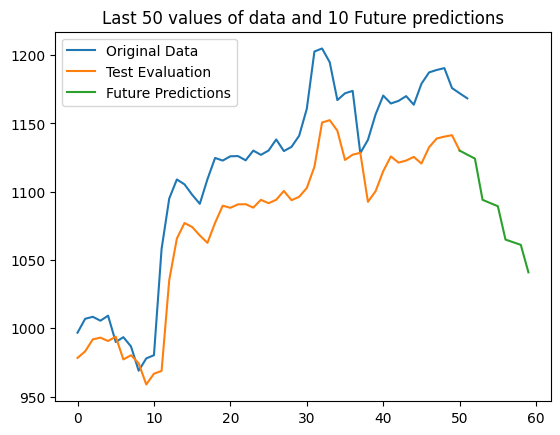

In [ ]:
# load the dataset
dataframe = read_csv("AMZN.csv", usecols=[1], engine='python', skipfooter=3).dropna()
dataset = dataframe.values[2000:]
dataset = dataset.astype('float32')


# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]


# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# create and fit the LSTM network
model3 = Sequential()
model3.add(LSTM(20, input_shape=(1,look_back), return_sequences=True))
model3.add(LSTM(10, input_shape=(1,look_back)))
model3.add(Dense(1))
model3.compile(loss='mean_squared_error', optimizer='adam')
model3.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)

# make predictions
trainPredict = model3.predict(trainX)
testPredict = model3.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plot_train_test(scaler.inverse_transform(dataset), trainPredict, testPredictPlot)

# Next day
# only visualising with last 50 from dataset
predictions = [None] * 50

testTemp = test[:]

# predict for 10 days
for _ in range(10):
    testX, y  = create_dataset(testTemp, look_back)
    # gets last element
    testX = numpy.reshape(testX[-1], (1, 1, testX.shape[1]))
    # make predictions based off last day
    testPredict = model3.predict(testX)


    # invert predictions
    testPredict = scaler.inverse_transform(testPredict)
    print("$"+str(testPredict[0][0]))
    predictions.append(testPredict[0][0])
    testPredictNorm = scaler.transform(testPredict)

    # append on for next prediction
    testTemp = numpy.append(testTemp, testPredictNorm, axis=0)
    
# plot baseline and predictions
plot_future(scaler.inverse_transform(dataset)[-52:], testPredictPlot[-52:],predictions)

# **Question 02**
- Using the Pollution dataset and "PowerConsumption_Zone3" as the target, develop an LSTM model for performance (lowest RMSE).
- This is a multivariate problem (you can use multiple attributes).
- Note you can add more nodes and stacks, for this problem keep the look back at 1. 
- Note as the code was generated for two attributes, you don't need to do a single prediction, the train and test data diagnostic plot is adequate. 

In [ ]:
data = pd.read_csv("powerconsumption.csv")
data.describe()


,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360


In [ ]:
dataMV =  data[["GeneralDiffuseFlows","PowerConsumption_Zone3"]].dropna().iloc[:1000]
dataMV.describe()

,GeneralDiffuseFlows,PowerConsumption_Zone3
count,1000.000000,1000.000000
mean,108.991631,17701.168193
std,165.073547,4428.950318
min,0.018000,10455.903610
25%,0.062000,14414.457833
50%,0.084000,16348.915660
75%,195.800000,20405.783130
max,508.400000,26573.493980


In [ ]:
variables = 2    # including class
dataset = dataMV.values.reshape(-1, variables)  # convert to numpy and make 2d array
dataset = dataset.astype('float32')

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), :]
        dataX.append(a)
        dataY.append(dataset[i + look_back, -1])
    return numpy.array(dataX), numpy.array(dataY)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# just for unnormalised
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

print("Non normalised data\n\n")
print("{:<30}{:<30}{:<40}".format("V1 (t-1)","V2 (t-1)", "V2 (t)"))
for i in range(5):
  print("{:<30}{:<30}{:<40}".format(trainX[i][0][0],trainX[i][0][1],trainY[i]))


# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)


# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]


# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

print("\n\nNormalised data\n\n")
print("{:<30}{:<30}{:<40}".format("V1 (t-1)","V2 (t-1)", "V2 (t)"))
for i in range(5):
  print("{:<30}{:<30}{:<40}".format(trainX[i][0][0],trainX[i][0][1],trainY[i]))

Non normalised data


V1 (t-1)                      V2 (t-1)                      V2 (t)                                  
0.050999999046325684          20240.962890625               20131.083984375                         
0.07000000029802322           20131.083984375               19668.43359375                          
0.06199999898672104           19668.43359375                18899.27734375                          
0.09099999815225601           18899.27734375                18442.41015625                          
0.04800000041723251           18442.41015625                18130.12109375                          


Normalised data


V1 (t-1)                      V2 (t-1)                      V2 (t)                                  
6.491181557066739e-05         0.6071043610572815            0.6002870202064514                      
0.00010228529572486877        0.6002870202064514            0.5715823769569397                      
8.654908742755651e-05         0.5715823769569397 

In [ ]:
model3 = Sequential()
model3.add(LSTM(50, input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model3.add(LSTM(20, input_shape=(trainX.shape[1], trainX.shape[2])))
model3.add(Dense(1))
model3.compile(loss='mean_squared_error', optimizer='adam')
model3.fit(trainX, trainY, epochs=5, batch_size=1, verbose=1)

Epoch 1/5
668/668 [==============================] - 4s 2ms/step - loss: 0.0293
Epoch 2/5
668/668 [==============================] - 1s 2ms/step - loss: 9.4133e-04
Epoch 3/5
668/668 [==============================] - 2s 2ms/step - loss: 9.3056e-04
Epoch 4/5
668/668 [==============================] - 2s 2ms/step - loss: 8.7237e-04
Epoch 5/5
668/668 [==============================] - 1s 2ms/step - loss: 7.7291e-04


11/11 [==============================] - 0s 1ms/step
[[0.         0.58315289]
 [0.         0.5762043 ]
 [0.         0.54708153]
 [0.         0.49925914]
 [0.         0.47120216]
 [0.         0.45219555]
 [0.         0.44099209]
 [0.         0.41182199]
 [0.         0.3860679 ]
 [0.         0.37244487]]


Train Score: 389.36 RMSE
Test Score: 445.74 RMSE


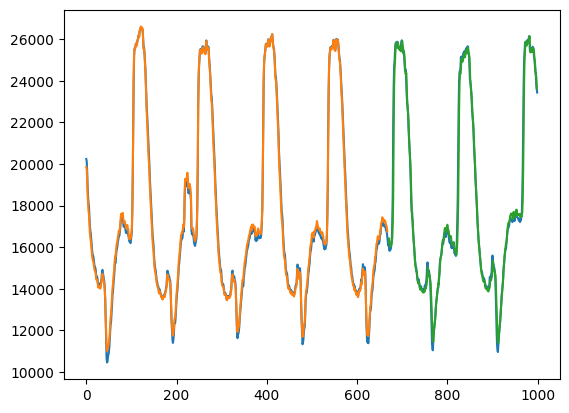

In [ ]:
# make predictions
trainPredict = model3.predict(trainX)
testPredict = model3.predict(testX)


# as we had two columns that the scaler was applied to =>
emptyTrain = np.zeros(len(trainX))
emptyTest = np.zeros(len(testX))

# create 2 column so it can be inversly transformed
trainPredict2 = np.vstack((emptyTrain, np.squeeze(trainPredict))).T
trainY2 = np.vstack((emptyTrain, np.squeeze(trainY))).T
testPredict2 = np.vstack((emptyTest, np.squeeze(testPredict))).T
testY2 = np.vstack((emptyTest, np.squeeze(testY))).T

print(trainPredict2[:10])

# need to take secondcolumn
trainPredict2 = scaler.inverse_transform(trainPredict2)[:,-1]
trainY2 = scaler.inverse_transform(trainY2)[:,-1]
testPredict2 = scaler.inverse_transform(testPredict2)[:,-1]
testY2 = scaler.inverse_transform(testY2)[:,-1]


# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY2, trainPredict2))
print('\n\nTrain Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY2, testPredict2))
print('Test Score: %.2f RMSE' % (testScore))


# shift test predictions for plotting
testPredictPlot = numpy.empty_like([None] * 1000)
testPredictPlot[:] = numpy.nan
testPredictPlot[len(trainPredict2)+(look_back*2)+1:len(dataset)-1] = testPredict2

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset)[:,-1])
plt.plot(trainPredict2)
plt.plot(testPredictPlot)
plt.show()